## LM3331 INDIVIDUAL PROJECT II: Ordinary differential equations

**TU Delft**<br>
**Q1 2021**<br>
**Modelling and Computation for Life Science and Technology**<br>

**Done by:** Raquel Romão, student number 5629608


---

In [1]:
#To import the necessary libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.optimize
from sympy import Matrix

1. Progress of the concentration of all chemical components using the **python built-in methods**

In [2]:
#Reaction rate coefficients (L/mol/s)
k1, k2, k3, k4, k5 = 4.72, 3e9, 1.5e4, 4e7, 1

#Initial reactants concentrations: [A0, Y0, X0, P0, B0, Z0, Q0]
y0 = [0.066, 0, 0, 0, 0.066, 0.002, 0]

t0, t_end, dt = 0, 80, 1e-3
t_span = [0,80]

In [3]:
#Definition of function to apply in solve_ivp
def fun(t,y, matrix=False):
    '''Defines an array (or Matrix, if specified) with the variation of concentrations of each component'''

    A, Y, X, P, B, Z, Q = y[0], y[1], y[2], y[3], y[4], y[5], y[6]

    dA = - k1*A*Y
    dY = - (k1*A*Y) - (k2*X*Y) + (k5*Z) #- r1 - r2 + r5
    dX = -(k2*X*Y) + (k3*B*X) - 2*(k4*X**2) + (k1*A*Y)
    dP = k2*X*Y
    dB = - k3*B*X
    dZ = k3*B*X - k5*Z
    dQ = k4*X**2
    
    if matrix==True:
        return Matrix([dA, dY, dX, dP, dB, dZ, dQ])
    
    else:
        return np.array([dA, dY, dX, dP, dB, dZ, dQ])

Using the default solve_ivp method `‘RK45’`:

In [4]:
res1 = solve_ivp(fun, t_span, y0)

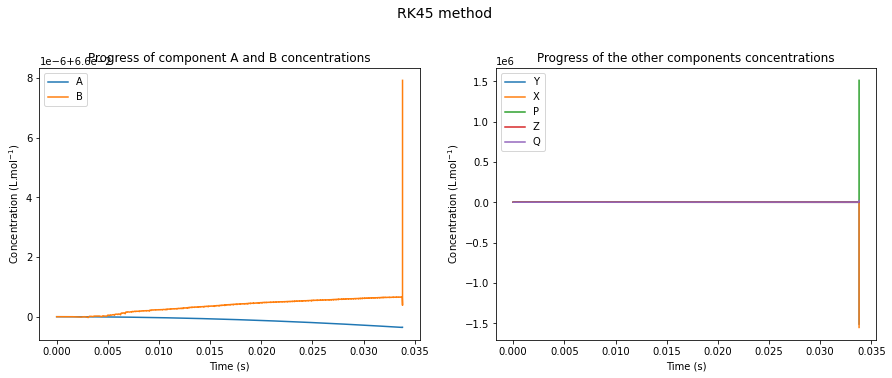

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('RK45 method', y=1.05, size=14)
    
ax[0].plot(res1.t, res1.y[0], label = 'A') 
ax[0].plot(res1.t, res1.y[4], label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(res1.t, res1.y[1], label = 'Y')
ax[1].plot(res1.t, res1.y[2], label = 'X')
ax[1].plot(res1.t, res1.y[3], label = 'P')
ax[1].plot(res1.t, res1.y[5], label = 'Z')
ax[1].plot(res1.t, res1.y[6], label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()
    
plt.show()

Using `BDF` method, first with the default absolute tolerance and then with an adjusted one:

In [6]:
res2 = solve_ivp(fun, t_span,  y0, method='BDF', rtol=10**(-4))

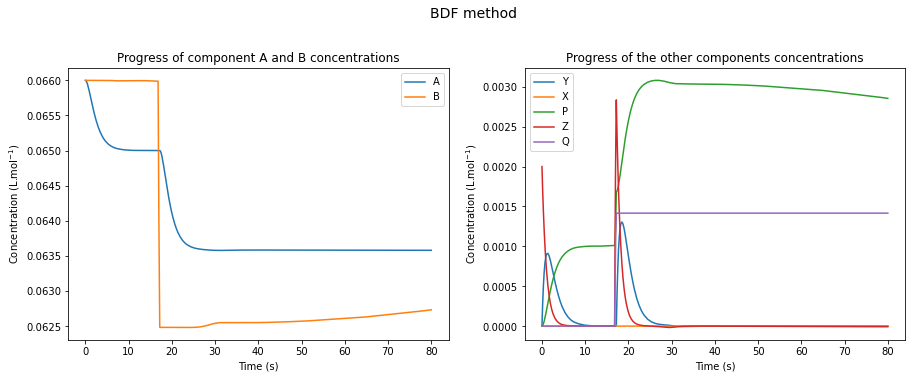

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('BDF method', y=1.05, size=14)
    
ax[0].plot(res2.t, res2.y[0], label = 'A') 
ax[0].plot(res2.t, res2.y[4], label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(res2.t, res2.y[1], label = 'Y')
ax[1].plot(res2.t, res2.y[2], label = 'X')
ax[1].plot(res2.t, res2.y[3], label = 'P')
ax[1].plot(res2.t, res2.y[5], label = 'Z')
ax[1].plot(res2.t, res2.y[6], label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()
    
plt.show()

In [8]:
res2 = solve_ivp(fun, t_span,  y0, method='BDF', rtol=10**(-4), atol=10**(-8))

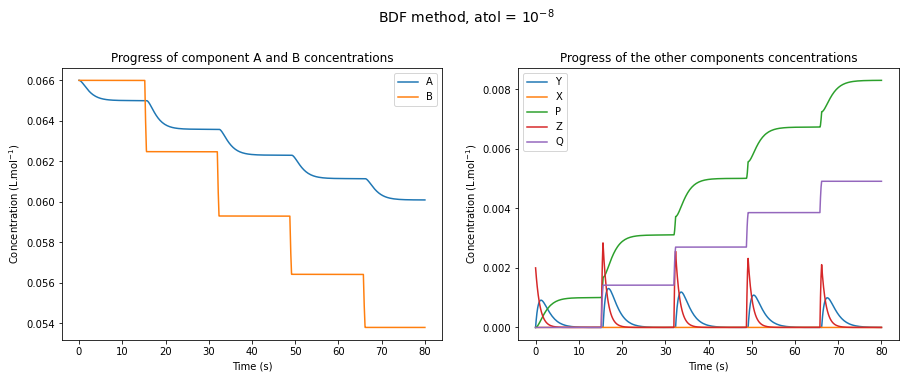

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('BDF method, atol = 10$^{-8}$', y=1.05, size=14)
    
ax[0].plot(res2.t, res2.y[0], label = 'A') 
ax[0].plot(res2.t, res2.y[4], label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(res2.t, res2.y[1], label = 'Y')
ax[1].plot(res2.t, res2.y[2], label = 'X')
ax[1].plot(res2.t, res2.y[3], label = 'P')
ax[1].plot(res2.t, res2.y[5], label = 'Z')
ax[1].plot(res2.t, res2.y[6], label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()
    
plt.show()

Using the `Radau` method:

In [11]:
res3 = solve_ivp(fun, t_span, y0, method='Radau')

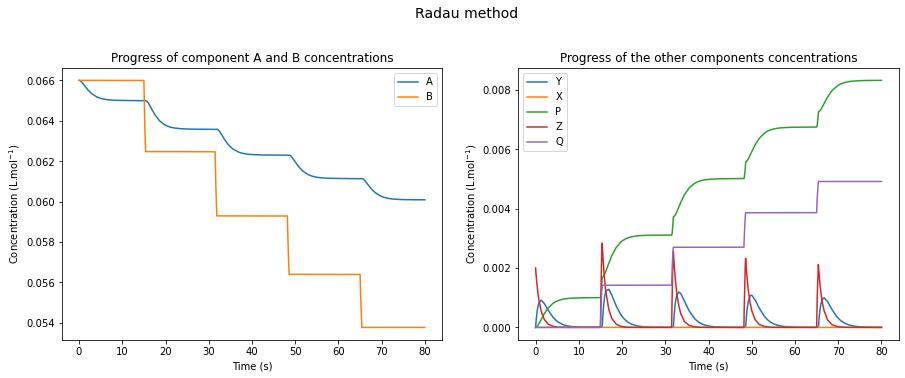

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('Radau method', y=1.05, size=14)
    
ax[0].plot(res3.t, res3.y[0], label = 'A') 
ax[0].plot(res3.t, res3.y[4], label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(res3.t, res3.y[1], label = 'Y')
ax[1].plot(res3.t, res3.y[2], label = 'X')
ax[1].plot(res3.t, res3.y[3], label = 'P')
ax[1].plot(res3.t, res3.y[5], label = 'Z')
ax[1].plot(res3.t, res3.y[6], label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()
    
plt.show()

At last, using the `LSODA` method, first with the default tolerance and then with an adjusted one:

In [13]:
res4 = solve_ivp(fun, t_span, y0, method='LSODA') 

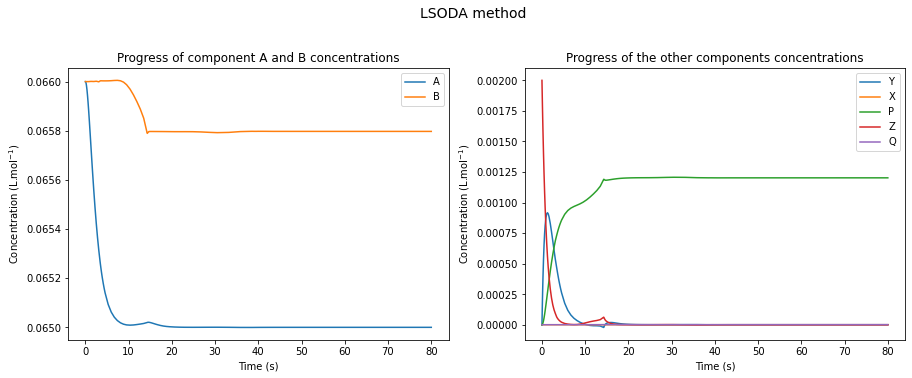

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('LSODA method', y=1.05, size=14)
    
ax[0].plot(res4.t, res4.y[0], label = 'A') 
ax[0].plot(res4.t, res4.y[4], label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(res4.t, res4.y[1], label = 'Y')
ax[1].plot(res4.t, res4.y[2], label = 'X')
ax[1].plot(res4.t, res4.y[3], label = 'P')
ax[1].plot(res4.t, res4.y[5], label = 'Z')
ax[1].plot(res4.t, res4.y[6], label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()
    
plt.show()

In [15]:
res4 = solve_ivp(fun, t_span, y0, method='LSODA', atol=10**-8) 

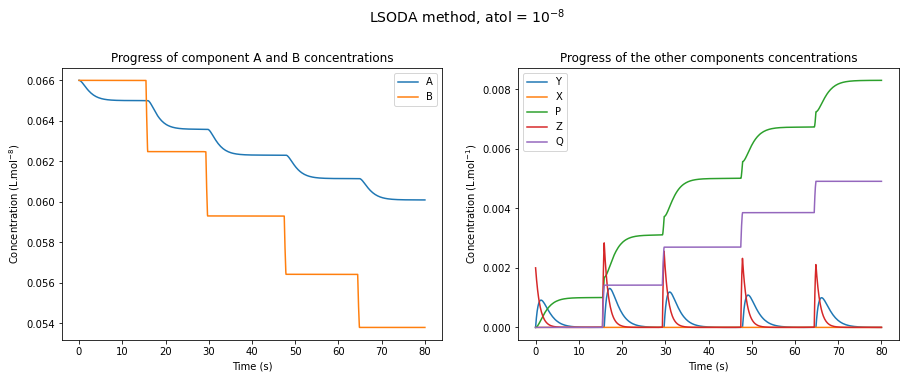

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('LSODA method, atol = 10$^{-8}$', y=1.05, size=14)
    
ax[0].plot(res4.t, res4.y[0], label = 'A') 
ax[0].plot(res4.t, res4.y[4], label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-8}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(res4.t, res4.y[1], label = 'Y')
ax[1].plot(res4.t, res4.y[2], label = 'X')
ax[1].plot(res4.t, res4.y[3], label = 'P')
ax[1].plot(res4.t, res4.y[5], label = 'Z')
ax[1].plot(res4.t, res4.y[6], label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()
    
plt.show()

2. Simulation of the concentrations of all the chemical components by coding my own **first-order scheme**.

In [18]:
#To determine the jacobian matrix
A = sp.symbols('A')
Y = sp.symbols('Y')
X = sp.symbols('X')
P = sp.symbols('P')
B = sp.symbols('B')
Z = sp.symbols('Z')
Q = sp.symbols('Q')
t = sp.symbols('t')

y = Matrix([A, Y, X, P, B, Z, Q])

#Use the function as a matrix, since the jacobian function used takes a matrix not an array
jacobian = fun(t, y, matrix=True).jacobian(y)
jacobian

Matrix([
[-4.72*Y,                  -4.72*A,                                          0, 0,          0,  0, 0],
[-4.72*Y, -4.72*A - 3000000000.0*X,                            -3000000000.0*Y, 0,          0,  1, 0],
[ 4.72*Y,  4.72*A - 3000000000.0*X, 15000.0*B - 160000000.0*X - 3000000000.0*Y, 0,  15000.0*X,  0, 0],
[      0,           3000000000.0*X,                             3000000000.0*Y, 0,          0,  0, 0],
[      0,                        0,                                 -15000.0*B, 0, -15000.0*X,  0, 0],
[      0,                        0,                                  15000.0*B, 0,  15000.0*X, -1, 0],
[      0,                        0,                               80000000.0*X, 0,          0,  0, 0]])

In [19]:
print(jacobian)

Matrix([[-4.72*Y, -4.72*A, 0, 0, 0, 0, 0], [-4.72*Y, -4.72*A - 3000000000.0*X, -3000000000.0*Y, 0, 0, 1, 0], [4.72*Y, 4.72*A - 3000000000.0*X, 15000.0*B - 160000000.0*X - 3000000000.0*Y, 0, 15000.0*X, 0, 0], [0, 3000000000.0*X, 3000000000.0*Y, 0, 0, 0, 0], [0, 0, -15000.0*B, 0, -15000.0*X, 0, 0], [0, 0, 15000.0*B, 0, 15000.0*X, -1, 0], [0, 0, 80000000.0*X, 0, 0, 0, 0]])


In [20]:
def jacobian(t, y):
    '''Defines the jacobian taking into account the jacobian calculated from the sympy library'''
    
    A, Y, X, P, B, Z, Q = y[0], y[1], y[2], y[3], y[4], y[5], y[6]
    
    J = np.array([[-4.72*Y, -4.72*A, 0, 0, 0, 0, 0], 
                  [-4.72*Y, -4.72*A - 3000000000.0*X, -3000000000.0*Y, 0, 0, 1, 0], 
                  [4.72*Y, 4.72*A - 3000000000.0*X, 15000.0*B - 160000000.0*X - 3000000000.0*Y, 0, 15000.0*X, 0, 0], 
                  [0, 3000000000.0*X, 3000000000.0*Y, 0, 0, 0, 0], 
                  [0, 0, -15000.0*B, 0, -15000.0*X, 0, 0], 
                  [0, 0, 15000.0*B, 0, 15000.0*X, -1, 0], 
                  [0, 0, 80000000.0*X, 0, 0, 0, 0]])
    return J

In [21]:
def back_euler(fun, y0 , it, dt, tol):
    '''Receives as an input a system of ODEs ('fun'), an array of initial values 'y0', an interval of time 'it', a step 'dt' and a tolerance 't'. 
    After applying the Backward Euler method alongside the Newthon-Raphson method, gives the list of solutions for each time as well as a list of those time values'''
    
    t = it[0]
    yn = np.array(y0) 
    t_end = it[1]
    yvalues = [yn]
    time = [t] 
    
    #definition of the Backward Euler equation
    def f(yn1, yn, t):
        return yn1 - yn - dt*fun(t, yn1)
    
    #definition of the jacobian to be used in NR
    def J(t, yn1):
        return np.identity(len(yn1)) - dt*(jacobian(t, yn1)) 
    
    while t < t_end:
        
        t = t + dt
        
        yn1 = yn + dt*fun(t,yn) #forward euler method = inicial guess for the NR method
        
        while np.linalg.norm(f(yn1, yn, t)) > tol:
        
            yn1 = yn1 - np.linalg.inv(J(t,yn1))@f(yn1, yn, t) #NR
            
        yn = yn1
        
        yvalues = yvalues + [yn]
        
        time = time + [t]
        
    return time, yvalues

In [28]:
import time
start = time.time()

res = back_euler(fun, y0 , t_span, dt, 10**(-15))

end = time.time()
print('Function running time:', end - start)

Function running time: 74.88612151145935


In [32]:
time = res[0]

#Since yvalues is in the format [C0, C1, ...] and C0=[A0, Y0, X0, P0, B0, Z0, Q0]:
#Definition of list of concentrations for each component, in order to plot it
A, Y, X, P, B, Z, Q = [], [], [], [], [], [], []
for C in res[1]:
    A += [C[0]]
    Y += [C[1]]
    X += [C[2]]
    P += [C[3]]
    B += [C[4]]
    Z += [C[5]]
    Q += [C[6]]

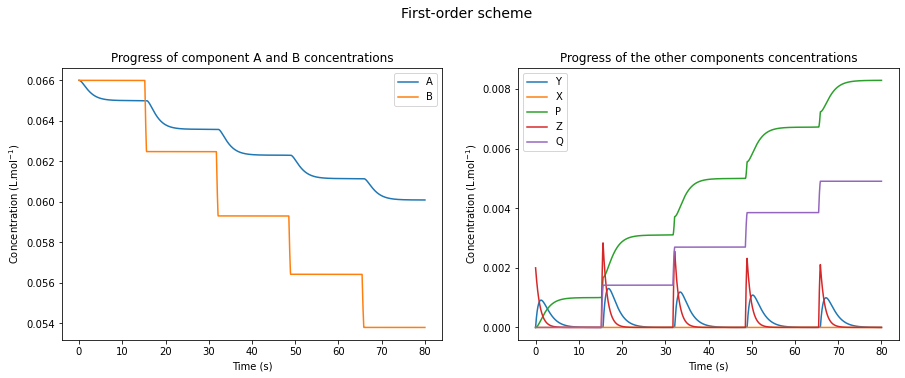

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
    
plt.suptitle('First-order scheme', y=1.05, size=14)

ax[0].plot(time, A, label = 'A') 
ax[0].plot(time, B, label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(time, Y, label = 'Y')
ax[1].plot(time, X, label = 'X')
ax[1].plot(time, P, label = 'P')
ax[1].plot(time, Z, label = 'Z')
ax[1].plot(time, Q, label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()

    
plt.show()

Testing the function with a higher tolerance (giving a misleading and INCORRECT simulation):

In [24]:
res_mis = back_euler(fun, y0 , t_span, dt, 10**(-6))

In [25]:
time = res_mis[0]

A, Y, X, P, B, Z, Q = [], [], [], [], [], [], []
for C in res_mis[1]:
    A += [C[0]]
    Y += [C[1]]
    X += [C[2]]
    P += [C[3]]
    B += [C[4]]
    Z += [C[5]]
    Q += [C[6]]

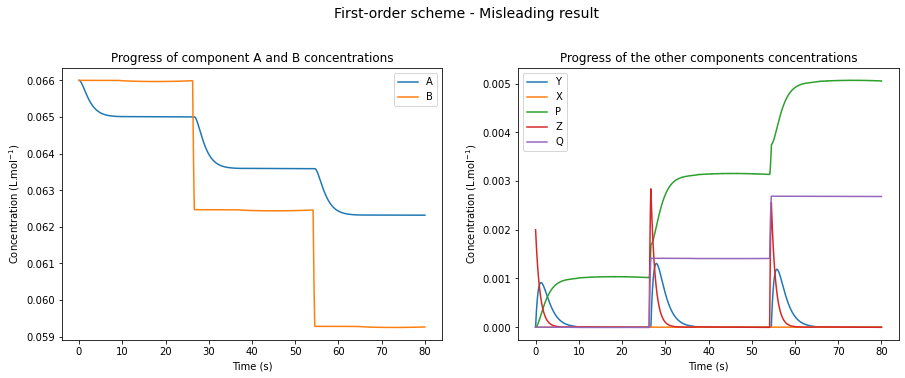

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
    
plt.suptitle('First-order scheme - Misleading result', y=1.05, size=14)

ax[0].plot(time, A, label = 'A') 
ax[0].plot(time, B, label = 'B')
    
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[0].set_title("Progress of component A and B concentrations")
ax[0].legend()
    
ax[1].plot(time, Y, label = 'Y')
ax[1].plot(time, X, label = 'X')
ax[1].plot(time, P, label = 'P')
ax[1].plot(time, Z, label = 'Z')
ax[1].plot(time, Q, label = 'Q')
    
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration (L.mol$^{-1}$)")

ax[1].set_title("Progress of the other components concentrations")
ax[1].legend()

    
plt.show()